In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1.Read "sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv" and print the feature name with numbers of missing entries.**

In [3]:
df = pd.read_csv('/content/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv')

In [4]:
df.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,...,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,Position,geolocation
0,2015-01-24T21:45:00+11:00,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,...,52.7,52.7,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124104500,NaN,"-37.8197121, 144.9413253"
1,2015-01-24T22:15:00+11:00,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,...,50.2,50.2,ENV,-37.819500,144.941889,NaN,Docklands Library,511-20150124111500,NaN,"-37.8195002, 144.9418888"
2,2015-01-24T22:15:00+11:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,57.9,57.9,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124111500,NaN,"-37.8199043, 144.9404851"
3,2015-01-24T22:55:00+11:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,...,53.7,53.7,ENV,-37.819904,144.940485,NaN,Docklands Library,509-20150124115500,NaN,"-37.8199043, 144.9404851"
4,2015-01-24T22:55:00+11:00,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,...,48.6,48.6,ENV,-37.819712,144.941325,NaN,Docklands Library,510-20150124115500,NaN,"-37.8197121, 144.9413253"


In [5]:
df.shape

(56570, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     56570 non-null  object 
 1   mac           56570 non-null  object 
 2   boardtype     56570 non-null  int64  
 3   boardid       56570 non-null  int64  
 4   temp_max      56570 non-null  float64
 5   temp_min      56570 non-null  float64
 6   temp_avg      56570 non-null  float64
 7   light_max     56570 non-null  float64
 8   light_min     56570 non-null  float64
 9   light_avg     56570 non-null  float64
 10  humidity_min  56570 non-null  float64
 11  humidity_max  56570 non-null  float64
 12  humidity_avg  56570 non-null  float64
 13  model         56570 non-null  object 
 14  latitude      56570 non-null  float64
 15  longitude     56570 non-null  float64
 16  elevation     34975 non-null  float64
 17  location      56570 non-null  object 
 18  rowid         56570 non-nu

**1.Read "sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t.csv" and print the feature name with numbers of missing entries.**

In [7]:
print(df.isnull().sum())

timestamp           0
mac                 0
boardtype           0
boardid             0
temp_max            0
temp_min            0
temp_avg            0
light_max           0
light_min           0
light_avg           0
humidity_min        0
humidity_max        0
humidity_avg        0
model               0
latitude            0
longitude           0
elevation       21595
location            0
rowid               0
Position        56570
geolocation         0
dtype: int64


**2.Fill in the missing entries. For filling any feature, you can use either the mean or median value of the feature values from observed entries. Explain the reason behind your choice and print replacement value of each feature.**

<Axes: >

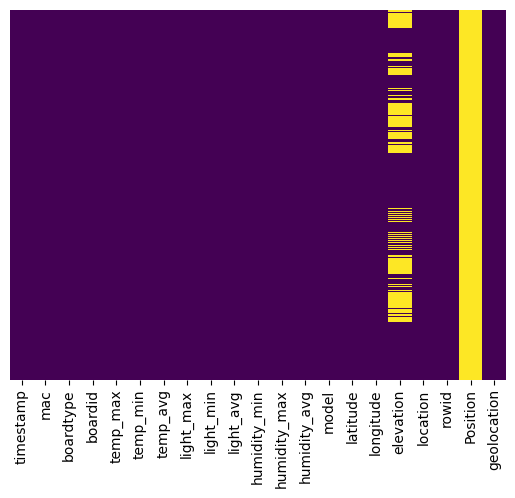

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can see there some number of values missing in the column "elevation" but in the column "Position" we can see there are no values in that columns which means 100% of values are missing in that column. So I would like to drop the column "Position" simply as it doesn't provide any useful information for my analysis or model training.I can't also fill up the missing values using multivariate imputation by comparing it with other columns because in the column "Position" as there is no value. In such cases, it's often appropriate to consider dropping the entire column.

In [9]:
df = df.drop(columns=['Position'], axis=1)

In [10]:
elevation_data_missing =  (df['elevation'].isnull().sum() / len(df)) * 100

In [11]:
elevation_data_missing

38.173943786459255

About 38% of datas are missing in the 'Elevation' column which might happen because of instances of sensor malfunction or failure. Malfunctioning equipment may lead to missing or inaccurate data.

In [12]:
mean_elevation = df['elevation'].mean()
median_elevation = df['elevation'].median()

In [13]:
df['mean_elevation'] = df['elevation'].fillna(mean_elevation)
df['median_elevation'] = df['elevation'].fillna(median_elevation)

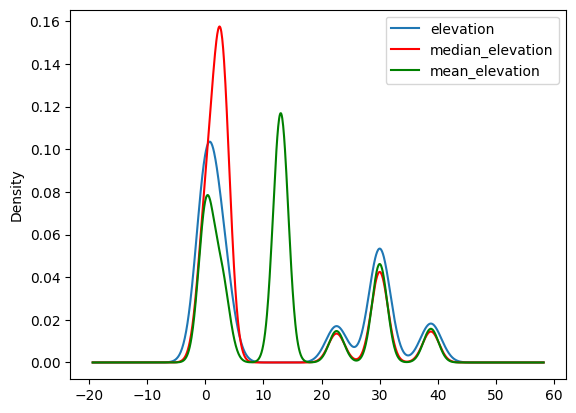

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df['elevation'].plot(kind='kde', ax=ax)

df['median_elevation'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
df['mean_elevation'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

After applying the techniques of mean and median for handling missing values in the column of "elevation", we can see that the median technique has performed better than the method mean as there are less changes of data points in that column "elevation" when I apply the median method and datapoints are normally distributed.Wheareas the method **"mean"** changes the datapoints to huge excent if I compare it to the original column of the dataset which is a very big red flag in the context of machine learning and data analysis

Furthermore, the Median is less sensitive to extreme values (i), making it a robust measure of central tendency and also it can handle outliers of a dataset more swiftly than the method Mean.

Ref:-
(i) https://stats.stackexchange.com/questions/559659/why-is-the-median-less-sensitive-to-extreme-values-compared-to-the-mean

Although , I dont prefer using mean,median or mode techniques to fill up null values in a dataset as it can increase the number of outliers in a dataset,rather I would have preferred using KNN inputer as it can easily fill up missing values in a column of a dataset by comparing it with the other columns of that particular dataset.

In [15]:
print("So the value that I would be using to fill up the missing values will be: ", median_elevation)

So the value that I would be using to fill up the missing values will be:  2.74


In [16]:
df = df.drop(columns=['median_elevation'], axis=1)
df = df.drop(columns=['mean_elevation'], axis=1)

In [17]:
df['elevation'] = df['elevation'].fillna(median_elevation)

In [18]:
df.head()

,timestamp,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,geolocation
0,2015-01-24T21:45:00+11:00,0013a20040b31571,1,510,19.4,19.4,19.4,0.9,0.9,0.9,52.7,52.7,52.7,ENV,-37.819712,144.941325,2.74,Docklands Library,510-20150124104500,"-37.8197121, 144.9413253"
1,2015-01-24T22:15:00+11:00,0013a20040b5b337,1,511,19.7,19.7,19.7,10.6,10.6,10.6,50.2,50.2,50.2,ENV,-37.819500,144.941889,2.74,Docklands Library,511-20150124111500,"-37.8195002, 144.9418888"
2,2015-01-24T22:15:00+11:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,57.9,57.9,57.9,ENV,-37.819904,144.940485,2.74,Docklands Library,509-20150124111500,"-37.8199043, 144.9404851"
3,2015-01-24T22:55:00+11:00,0013a20040b31583,1,509,19.7,19.7,19.7,3.1,3.1,3.1,53.7,53.7,53.7,ENV,-37.819904,144.940485,2.74,Docklands Library,509-20150124115500,"-37.8199043, 144.9404851"
4,2015-01-24T22:55:00+11:00,0013a20040b31571,1,510,18.7,18.7,18.7,1.0,1.0,1.0,48.6,48.6,48.6,ENV,-37.819712,144.941325,2.74,Docklands Library,510-20150124115500,"-37.8197121, 144.9413253"


**3.Encode the categorical variable  location" using an appropriate encoding approach and display the encoded values. Justify your selection of encoding approach.  Save the modified data into a csv file and upload it to Ontrack.**

Starting with the encoding, I would like first talk about the types of catergorical data that exists in the context of machine learning. There are two types of catergorical data are: - 1.Ordinal Categorical Data 2. Nominal Categorical Data.

Ordinal Categorical Data:- Ordinal Data are those types of Data which have order within their Data,for example feedbacks that could be given to a student like Excellent, Good and Bad. In these types of data there is a rank for each feedback data that has been assigned like Excellent might get a rank of 1 wherease Good will get a rank of 0 and Bad might get a rank of -1.These ranks assigned numerically so that we can feed a machine learning model to train on those datas.

Nominal Data:- Nominal data are the opposite of Ordinal data as there is no rank exits within those datas like Male and Female. A gender cannot be rank higher or less from each other as both holds the same value and important to carry out a work. Certainly, it might get converted to numerical values but there will be no rank of those values, these numerical values will only be used to indentify weather its a male or female.

In [20]:
df['mac'].value_counts()

0013a20040b31583    19119
0013a20040b31571    12038
0013a20040b3155c     6626
0013a20040b5b337     4598
0013a20040b516f6     2918
0013a20040b516ed     2915
0013a20040b315ec     2903
0013a20040b4b755     2728
0013a20040b5b318     2725
Name: mac, dtype: int64

In [21]:
df['model'].value_counts()

ENV    56570
Name: model, dtype: int64

In [22]:
df['location'].value_counts()

Docklands Library    42381
Fitzroy Gardens      14189
Name: location, dtype: int64

As I can see in the above there are no columns which has categorical values where I can assign rank so that there is a difference between the values when I am trying to train a model for predictions.So all the columns contains Nominal Categorical values for which I will be using One-Hot Encoding to transform the values into numerical values and moreover One-Hot Endcoding is a technique where it sets random values to the categorical datas or values.

In [23]:
df_1 = pd.get_dummies(df,columns=['mac','location'])

In [24]:
df_1 = pd.get_dummies(df_1,columns=['model'])

In [25]:
df = pd.get_dummies(df,columns=['model'])
df = pd.get_dummies(df,columns=['mac'],drop_first=True)
df = pd.get_dummies(df,columns=['location'])

I am removing the first column here by using drop_first=True becauase I dont want to face the problem multicollinearity while training machine learning algorithms because it create problems to determine the individual effect of each independent variable on the dependent variable(ii)

Ref:

(ii)https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Multicollinearity%20occurs%20when%20two%20or%20more%20independent%20variables%20have%20a,variable%20on%20the%20dependent%20variable.

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56570 entries, 0 to 56569
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   timestamp                   56570 non-null  object 
 1   boardtype                   56570 non-null  int64  
 2   boardid                     56570 non-null  int64  
 3   temp_max                    56570 non-null  float64
 4   temp_min                    56570 non-null  float64
 5   temp_avg                    56570 non-null  float64
 6   light_max                   56570 non-null  float64
 7   light_min                   56570 non-null  float64
 8   light_avg                   56570 non-null  float64
 9   humidity_min                56570 non-null  float64
 10  humidity_max                56570 non-null  float64
 11  humidity_avg                56570 non-null  float64
 12  latitude                    56570 non-null  float64
 13  longitude                   565

In [27]:
df_1.head()

,timestamp,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,...,mac_0013a20040b31583,mac_0013a20040b315ec,mac_0013a20040b4b755,mac_0013a20040b516ed,mac_0013a20040b516f6,mac_0013a20040b5b318,mac_0013a20040b5b337,location_Docklands Library,location_Fitzroy Gardens,model_ENV
0,2015-01-24T21:45:00+11:00,1,510,19.4,19.4,19.4,0.9,0.9,0.9,52.7,...,0,0,0,0,0,0,0,1,0,1
1,2015-01-24T22:15:00+11:00,1,511,19.7,19.7,19.7,10.6,10.6,10.6,50.2,...,0,0,0,0,0,0,1,1,0,1
2,2015-01-24T22:15:00+11:00,1,509,19.7,19.7,19.7,3.1,3.1,3.1,57.9,...,1,0,0,0,0,0,0,1,0,1
3,2015-01-24T22:55:00+11:00,1,509,19.7,19.7,19.7,3.1,3.1,3.1,53.7,...,1,0,0,0,0,0,0,1,0,1
4,2015-01-24T22:55:00+11:00,1,510,18.7,18.7,18.7,1.0,1.0,1.0,48.6,...,0,0,0,0,0,0,0,1,0,1


In [28]:
drop_columns = ['timestamp','boardtype','boardid','temp_max','temp_min','temp_avg','light_max','light_min','light_avg','humidity_min','humidity_max','humidity_avg','latitude','longitude','elevation','rowid','geolocation']
df_1 = df_1.drop(columns=drop_columns)

In [29]:
df_1.head()

,mac_0013a20040b3155c,mac_0013a20040b31571,mac_0013a20040b31583,mac_0013a20040b315ec,mac_0013a20040b4b755,mac_0013a20040b516ed,mac_0013a20040b516f6,mac_0013a20040b5b318,mac_0013a20040b5b337,location_Docklands Library,location_Fitzroy Gardens,model_ENV
0,0,1,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,1,1,0,1
2,0,0,1,0,0,0,0,0,0,1,0,1
3,0,0,1,0,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,0,0,1,0,1


In [30]:
df_1.to_csv('Modified_csv.csv')

**What is Min-Max Scaling?**

Min-Max Scaling is a crucial step in the data normalization process. It is a preprocessing method used to bring all of the feature values in a dataset to the same scale. This procedure reduces the impact of different scales on machine learning models, improving data analysis and modeling accuracy.

Min-Max Scaling is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1.

Xsc=X−Xmin / Xmax−Xmin.

Here, Xmax and Xmin are the maximum and the minimum values of the feature, respectively:

a.When the value of X is the minimum value in the column, the numerator will be 0, and hence Xsc is 0

b.On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator, and thus the value of Xsc is 1.

c.If the value of X is between the minimum and the maximum value, then the value of Xsc is between 0 and 1

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
columns_to_scale = ['boardtype','boardid','temp_max','temp_min','temp_avg','light_max','light_min','light_avg','humidity_min','humidity_max','humidity_avg']

In [33]:
df_before_scaling = df[columns_to_scale]

In [34]:
scaler = MinMaxScaler()

In [35]:
scaler.fit(df_before_scaling)

df_scaled = scaler.transform(df_before_scaling)

In [36]:
df_scaled = pd.DataFrame(df_scaled, columns=df_before_scaling.columns)

In [37]:
df_scaled.head()

,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
0,0.0,0.9,0.370732,0.370732,0.370732,0.009119,0.009119,0.009119,0.609105,0.609105,0.609105
1,0.0,1.0,0.378049,0.378049,0.378049,0.107396,0.107396,0.107396,0.589482,0.589482,0.589482
2,0.0,0.8,0.378049,0.378049,0.378049,0.031408,0.031408,0.031408,0.649922,0.649922,0.649922
3,0.0,0.8,0.378049,0.378049,0.378049,0.031408,0.031408,0.031408,0.616954,0.616954,0.616954
4,0.0,0.9,0.353659,0.353659,0.353659,0.010132,0.010132,0.010132,0.576923,0.576923,0.576923


In [38]:
np.round(df_before_scaling.describe(), 1)

,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
count,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0
mean,1.0,507.9,18.5,18.5,18.5,48.7,48.7,48.7,49.4,49.4,49.4
std,0.0,2.7,5.5,5.5,5.5,44.0,44.0,44.0,13.4,13.4,13.4
min,1.0,501.0,4.2,4.2,4.2,0.0,0.0,0.0,-24.9,-24.9,-24.9
25%,1.0,506.0,14.8,14.8,14.8,2.9,2.9,2.9,41.7,41.7,41.7
50%,1.0,509.0,17.7,17.7,17.7,49.9,49.9,49.9,51.0,51.0,51.0
75%,1.0,510.0,21.9,21.9,21.9,94.9,94.9,94.9,58.7,58.7,58.7
max,1.0,511.0,45.2,45.2,45.2,98.7,98.7,98.7,102.5,102.5,102.5


In [39]:
np.round(df_scaled.describe(), 1)

,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg
count,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0,56570.0
mean,0.0,0.7,0.3,0.3,0.3,0.5,0.5,0.5,0.6,0.6,0.6
std,0.0,0.3,0.1,0.1,0.1,0.4,0.4,0.4,0.1,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.5,0.3,0.3,0.3,0.0,0.0,0.0,0.5,0.5,0.5
50%,0.0,0.8,0.3,0.3,0.3,0.5,0.5,0.5,0.6,0.6,0.6
75%,0.0,0.9,0.4,0.4,0.4,1.0,1.0,1.0,0.7,0.7,0.7
max,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **Plot Distribution of First six features Before and After scaling.**

<ipython-input-293-27be4459a37a>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_before_scaling['boardtype'], ax=ax1)
<ipython-input-293-27be4459a37a>:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df_scaled['boardtype'], ax=ax2)


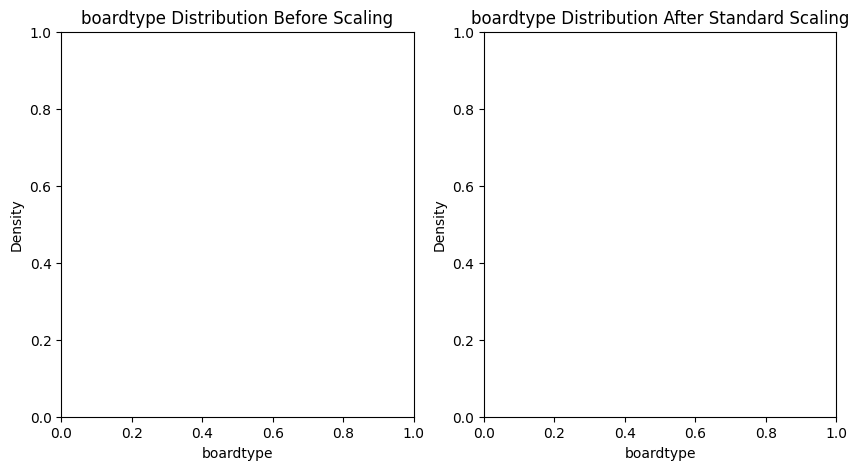

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('boardtype Distribution Before Scaling')
sns.kdeplot(df_before_scaling['boardtype'], ax=ax1)

# after scaling
ax2.set_title('boardtype Distribution After Standard Scaling')
sns.kdeplot(df_scaled['boardtype'], ax=ax2)
plt.show()

There was a single value in the column 'boardtype' which was 1 and it was scaled to 0. Hence there is no change of the distribution in the column 'Boardtype'. There is only single value in the 'Boardtype' because only 1 Board has been used in the sensor for which there is no change of values.

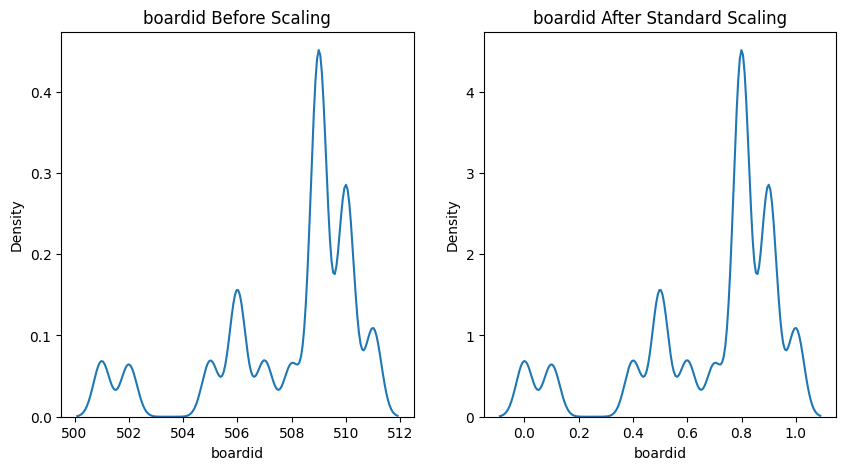

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('boardid Before Scaling')
sns.kdeplot(df_before_scaling['boardid'], ax=ax1)

# after scaling
ax2.set_title('boardid After Standard Scaling')
sns.kdeplot(df_scaled['boardid'], ax=ax2)
plt.show()

In the above figure,we can see there is no change in the distribution of 'boardid' but if we observe carefully we can see that distribution we between 500 to 512 before scaling that specific column but after when the column got scaled ,the distrubution got into the range of 0 to 1 which is the prime usefullness of using Min-Max scaling in the context of Normalization.

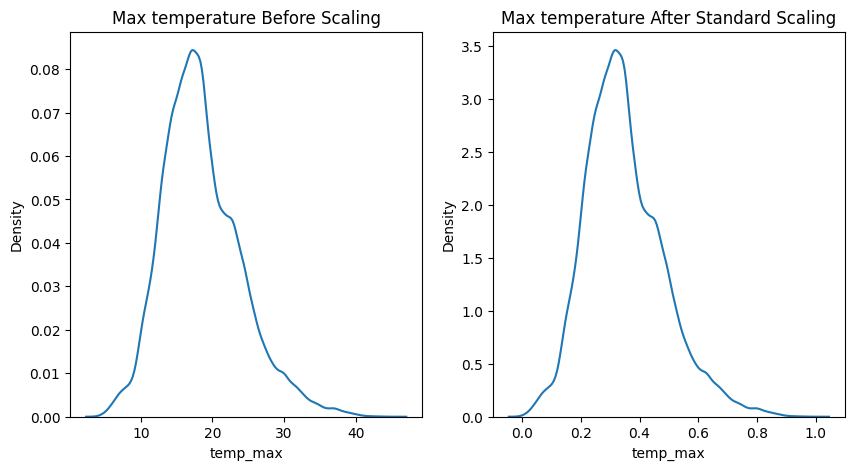

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('Max temperature Before Scaling')
sns.kdeplot(df_before_scaling['temp_max'], ax=ax1)

# after scaling
ax2.set_title('Max temperature After Standard Scaling')
sns.kdeplot(df_scaled['temp_max'], ax=ax2)
plt.show()

In the above,we tried to describe of the change of 'temp_max' where temp_max means Maximum tempeture under a specific condition. But after observing carefully we can see that there is no change of distribution before and after scaling the column 'temp_max'. Only the range was compressed to a specific sequence that is from 0.0 to 1.0.

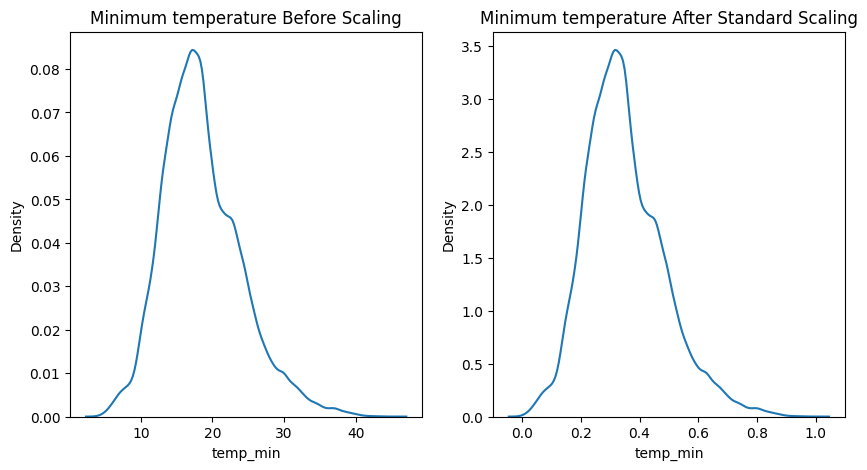

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('Minimum temperature Before Scaling')
sns.kdeplot(df_before_scaling['temp_min'], ax=ax1)

# after scaling
ax2.set_title('Minimum temperature After Standard Scaling')
sns.kdeplot(df_scaled['temp_min'], ax=ax2)
plt.show()

In the above,we tried to describe of the change of 'temp_max' where temp_min means Min tempeture under a specific condition.As observed, there is no change of the distribution in the temp_min as well when it was scaled by using the technique of min-max scaling.

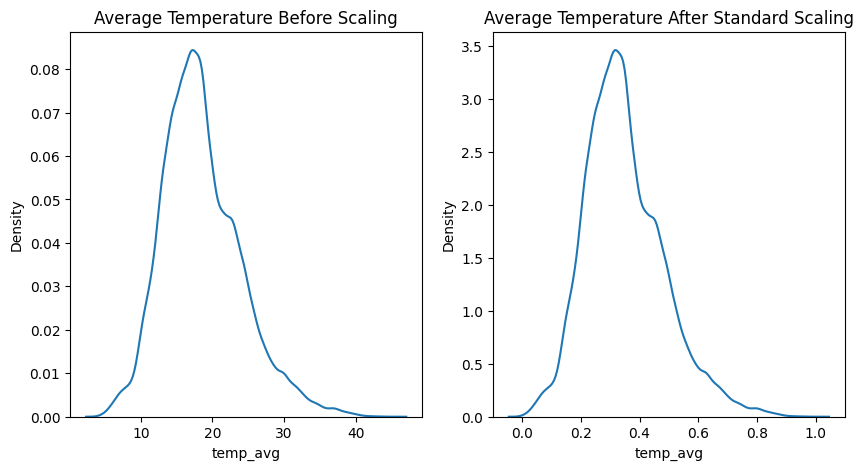

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('Average Temperature Before Scaling')
sns.kdeplot(df_before_scaling['temp_avg'], ax=ax1)

# after scaling
ax2.set_title('Average Temperature After Standard Scaling')
sns.kdeplot(df_scaled['temp_avg'], ax=ax2)
plt.show()

In the same way,there is no change in the distrubution of temp_avg as well,only the range got compressed from 0 to 1.

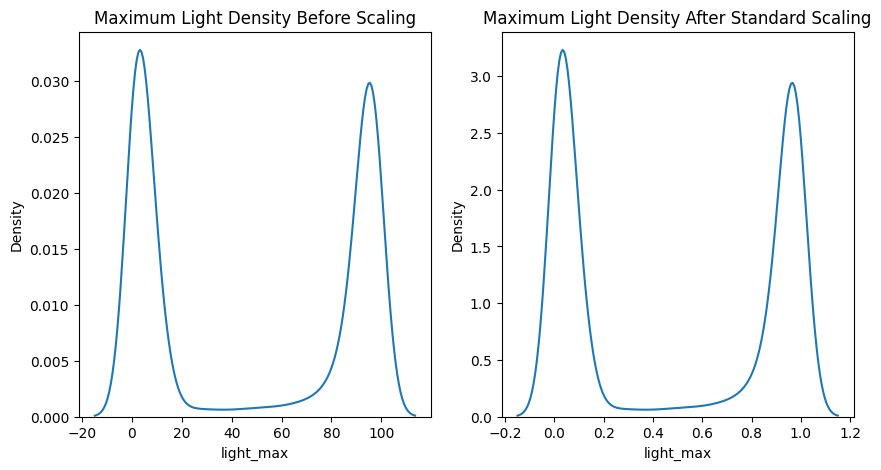

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('Maximum Light Density Before Scaling')
sns.kdeplot(df_before_scaling['light_max'], ax=ax1)

# after scaling
ax2.set_title('Maximum Light Density After Standard Scaling')
sns.kdeplot(df_scaled['light_max'], ax=ax2)
plt.show()

Similarly,there was no change in light_max either when I scaled the column.

# **Comparision between Minimum temperature and Maximum light Density accordance to before and after Scaling.**

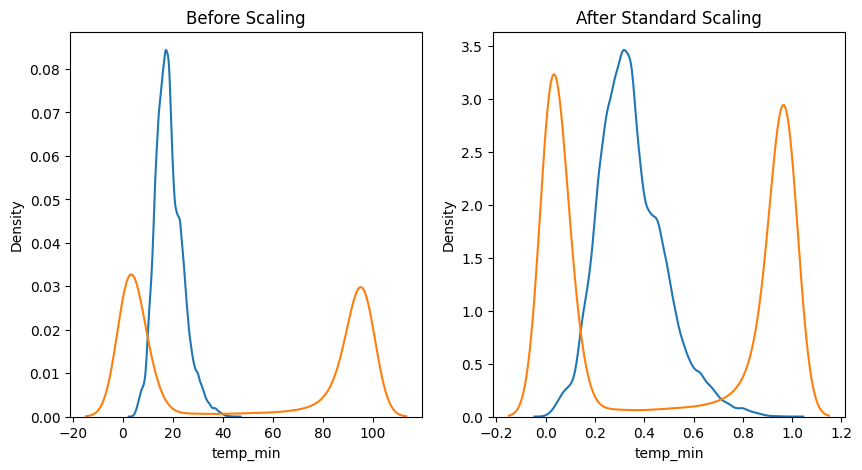

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scaling['temp_min'], ax=ax1)
sns.kdeplot(df_before_scaling['light_max'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(df_scaled['temp_min'], ax=ax2)
sns.kdeplot(df_scaled['light_max'], ax=ax2)
plt.show()

In the above figure, I can see a slight change between the columns when scaling was done on both of the colulmns. A peak has been seen in both of the features when min-max scaling technique was applied on their column. And the datapoints got normally distributed as well in the 'Minimum temperature' column which is good in sense when values get equally distributeed in a column.